#### Translation and scaling

To simplify computations, quadrature rules are usually defined over the **reference interval** $[-1, 1]$. Then, an integral over some arbitrary interval $[a, b]$ can be obtained by translation and scaling using a change of variable, letting

$$
y = \frac{b-a}{2} \left(x+1\right) + a \qquad \Rightarrow \qquad dy = \frac{b-a}{2} dx.
$$

We therefore have

\begin{align}
\int_a^b f(y) \ dy &= \frac{b-a}{2} \int_{-1}^1 f\left(\frac{b-a}{2} \left(x+1\right) + a\right) \ dx \\
& \approx \frac{b-a}{2} \sum_{k=0}^{N-1} w_k f(y_k), \qquad \text{with } y_k = \frac{b-a}{2} \left(x_k+1\right) + a, \quad k=0, \dots, N-1.
\end{align}

trapezoid rule 
reference interval:   x0 = -1, x1 = 1
weights: w0 = 1, w1 = 1

In [13]:
import numpy as np

def quadrature(f, xk, wk, a, b):
    '''
    Approximates the integral of f over [a, b],
    using the quadrature rule with weights wk
    and nodes xk.
    
    Input:
    f (function): function to integrate (as a Python function object)
    xk (Numpy array): vector containing all nodes
    wk (Numpy array): vector containing all weights
    a (float): left boundary of the interval
    b (float): right boundary of the interval
    
    Returns:
    I_approx (float): the approximate value of the integral
        of f over [a, b], using the quadrature rule.
    '''
    # Define the shifted and scaled nodes
    yk = (b-a)/2 * (xk + 1) + a
    
    # Compute the weighted sum
    I_approx = (b-a)/2 * np.sum(wk * f(yk))
    
    return I_approx

<function matplotlib.pyplot.show(close=None, block=None)>

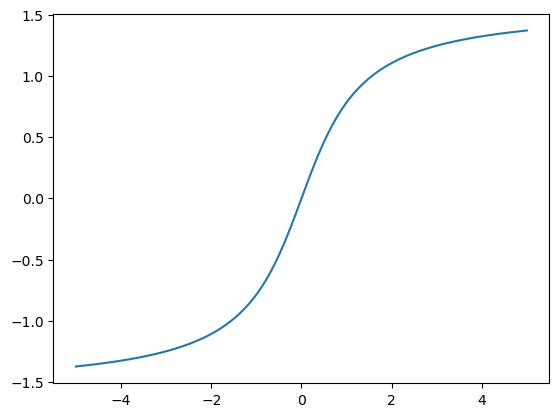

In [7]:
import matplotlib.pyplot as plt


# choose a test function (noy polynomial) which we know integral of 

def f(x):
    return np.arctan(x)

def F(x):
    '''
    Exact value for the indefinite integral of f(x) = arctan(x)
    '''
    return  

fig, ax = plt.subplots()
x = np.linspace(-5, 5, 200)
ax.plot(x, f(x))
plt.show

#### $N = 3$: Simpson's rule

The "closed" quadrature with $N=3$ nodes is known as Simpson's rule. The three nodes are

$$
x_0 = -1, \quad x_1 = 0, \quad x_2 = 1.
$$

The interpolating polynomial passing through the points $(-1, f(-1))$, $(0, f(0))$, $(1, f(1))$ is a parabola (degree 2), so Simpson's rule approximates the integral by computing the blue surface below.

![Simpson's rule.](graphics/simpson.png)


Since we have 3 nodes, the degree of precision is at least 2, so the midpoint rule integrates polynomials of degree up to 2 exactly. Therefore we must have

$ \int_{-1}^1 1 \ dx = 2 = w_0 + w_1 + w_2, $$ $$ \int_{-1}^1 x \ dx = 0 = -w_0 + 0 + w_2, $$ $$ \int_{-1}^1 x^2 \ dx = \frac{2}{3} = w_0 + 0 + w_2. $

The second equation gives $w_0 = w_2$, the third then gives $w_0 = w_2 = \frac{1}{3}$. Substituting into the first equation, we get $w_1 = \frac{4}{3}$.

### 🚩 Definition: Rate of convergence of composite rules


Using a composite quadrature rule with sub-intervals with sufficiently small width $h$, we have

$$
E = \alpha h^r,
$$

where $\alpha$ is some constant, and $r$ is the **rate of convergence** of the composite method. We say that the method is of *order* $r$.
E is the error of the integrals 

In [15]:
# Simpsons rule
xk = np.array([-1, 0, 1])
wk = np.array([1/3, 4/3, 1,3])

# choose some interval
a, b = 0, 4


# Choosee some values of h (width of subinterval)
# M is no of subintervals
#M = [2**k for k in range(2,11)]
M_vals = np.logspace(2,10, base=2, dtype =int)

h_vals = (b -a ) / M_vals
#print(h_vals)



#calculate integral for all different vals of h 

I_approx_vals = []
for M in M_vals:
    # Calculate the integral using the composite rule
    # The quardrature defined above gives the intergal over one sub interval so we need sum - need to know boundarys of each subinterval

    # Calculate bounds of each subpartition
    c = np.linspace(a, b, M+1)

    # Sum up integral approxiamted over subiterval
    I_approx = 0
    for i in range(M):
        I_approx += quadrature(f, xk, wk, c[i], c[i+1])

    I_approx_vals.append(I_approx)

I_exact = F(b) - F(a)
error = np.abs(I_exact - np.array(I_approx_vals))
print(error)

fig, ax = plt.subplots()
ax.plot(np.log(h_vals), np.log(error), 'x')
ax.set(xlabel = 'log(h)', ylabel = 'log(error)')
plt.show()

# Find the slope (=r)
#Fit a polynomial degree 1 (a line) through all data points
coeffs = np.polyfit(np.log(h_vals), np.log(error), 1)
print(f'r = coeffs{0}')

#SO rate of convergence of simpsons rule is 4

#To find for any other rule, just need to chane the nodes and weights defined


    



ValueError: operands could not be broadcast together with shapes (4,) (3,) 